## Neural network (nnet)

In [1]:
library(nnet)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Confusion matrix function
confusion_matrix <- function(valid, predi, posLabel="yes"){
 cm <- table(valid, predi)
 print("Confusion matrix")
 print(cm)
 error_rate <- 1-sum(diag(cm))/sum(cm)
 print(paste("Error rate =", error_rate))
}

In [5]:
# Data
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv")

In [19]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)
training_set

id,population,permit,construction_year,quality_group,quantity,Internal,Lake.Nyasa,Lake.Rukwa,Lake.Tanganyika,Lake.Victoria,Pangani,Rufiji,Ruvuma...Southern.Coast,Wami...Ruvu,V1,Company,None,Other,Parastatal,Private.operator,SWC,Trust,VWC,Water.authority,Water.Board,WUA,WUG,gravity,handpump,motorpump,rope.pump,submersible,wind.powered,commercial,parastatal,user.group,never.pay,pay.annually,pay.monthly,pay.per.bucket,pay.when.scheme.fails,unknown,borehole,rainwater.harvesting,river.lake,shallow.well,spring,cattle.trough,communal.standpipe,dam,hand.pump,improved.spring,other,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X24,X40,X60,X80,X90,X99
functional,-0.072620675,0.6889358,-1.2105682,0.3440186,0.81768317,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
functional,-0.083390092,0.6889358,0.0000000,0.3440186,-0.08578228,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
functional,-0.618251113,0.6889358,-1.2105682,-3.1172670,0.81768317,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
non functional,-0.076248759,0.6889358,0.0000000,0.3440186,0.81768317,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
non functional,-0.076248759,0.6889358,0.0000000,-0.8097433,0.81768317,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
non functional,0.487932545,0.6889358,0.0000000,-3.1172670,-0.08578228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
functional,-0.083390092,0.6889358,0.0000000,0.3440186,0.81768317,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
functional,0.135551581,-1.5302158,-1.4092612,-3.1172670,0.81768317,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
functional,-0.072620675,-1.5302158,0.9750546,0.3440186,-0.98924773,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
functional,-0.618251113,0.6889358,-1.2105682,0.3440186,0.81768317,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Columns to drop in training and validation dataset
columns_to_drop<-c("X.1","X")
training_set<-training_set[,!(names(training_set) %in% columns_to_drop)] # Drop the desired columns
validation_set<-validation_set[,!(names(validation_set) %in% columns_to_drop)]# Drop the desired columns

In [7]:
training_set$id = factor(training_set$id)

### NN with no hidden layer

In [33]:
# Neural network with 0 neuron in the hidden layer
set.seed(100)
nn0 <- nnet(id ~ ., data = training_set, skip = TRUE, size = 0, maxit = 1000) # No neuron in the hidden layer

# weights:  243
initial  value 89205.263977 
iter  10 value 50503.273222
iter  20 value 48180.869467
iter  30 value 46510.001299
iter  40 value 42324.796357
iter  50 value 39082.693614
iter  60 value 37648.126178
iter  70 value 36729.109658
iter  80 value 35604.765528
iter  90 value 34486.017127
iter 100 value 33848.544166
iter 110 value 33572.423892
iter 120 value 33327.219014
iter 130 value 33075.426529
iter 140 value 32499.211926
iter 150 value 32416.976752
iter 160 value 32391.392209
iter 170 value 32335.667922
final  value 32332.496092 
converged


In [35]:
# Confusion matrix
predic_nn0 <- predict(nn0, newdata = validation_set, type="class")

confusion_matrix(validation_set$id, predic_nn0)

[1] "Confusion matrix"
                         predi
valid                     functional functional needs repair non functional
  functional                    5535                       9            979
  functional needs repair        636                      12            269
  non functional                1741                       7           2922
[1] "Error rate = 0.300660611065235"


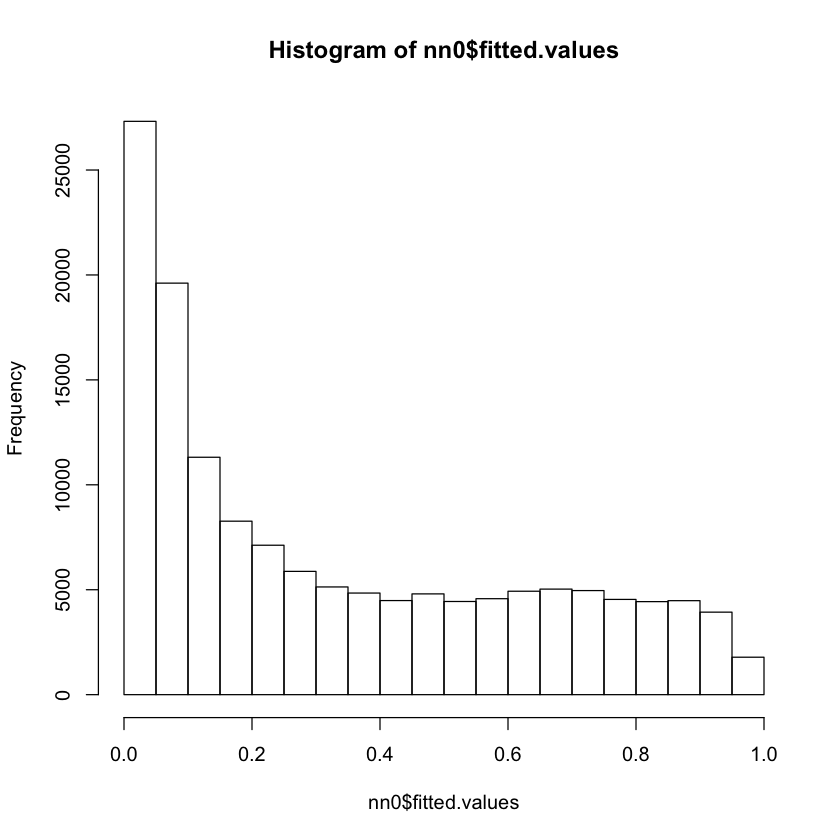

In [36]:
# Conditional probability frequency histogram
hist(nn0$fitted.values)

In [23]:
# Weights of each feature
weights <- nn0$wts[2:length(nn0$wts)]
names(weights) <- nn0$coefnames
print(weights)

             population                  permit       construction_year 
          -0.0259542333            0.1123161875           -0.7921356932 
          quality_group                quantity                Internal 
          -0.1702247722            0.5259010619            0.1460194461 
             Lake.Nyasa              Lake.Rukwa         Lake.Tanganyika 
           0.5979820337           -0.0738417833            0.0884444411 
          Lake.Victoria                 Pangani                  Rufiji 
          -0.3125343838            0.4499022527            0.1879866269 
Ruvuma...Southern.Coast             Wami...Ruvu                      V1 
           0.0427886863            0.4014241786            0.2412089608 
                Company                    None                   Other 
          -0.6546530760            2.2432980356            0.5202659371 
             Parastatal        Private.operator                     SWC 
          -0.2164698256            0.3265405281    

In [24]:
# Features with heaviest weights in decreasing order
print(sort(abs(weights), decreasing=TRUE)[1:15])

     X24     None     <NA>     <NA>     <NA>     <NA>     <NA>     <NA> 
2.260403 2.243298 2.221616 2.158367 2.077431 1.745212 1.732220 1.382190 
    <NA>     <NA>     <NA>     <NA>     <NA>     <NA>      SWC 
1.333757 1.239525 1.173355 1.147843 1.108952 1.086977 1.085006 


### NN with hidden layer (2 neurons)

In [39]:
# Neural network with 2 neurons in hidden layer
set.seed(101)
nn2 <- nnet(id ~ ., data = training_set, skip = FALSE, size = 2, maxit = 1000)

# weights:  171
initial  value 67290.410841 
iter  10 value 37701.762455
iter  20 value 36784.433235
iter  30 value 36095.912064
iter  40 value 35612.782954
iter  50 value 35340.602177
iter  60 value 35008.104272
iter  70 value 34810.365361
iter  80 value 34701.069750
iter  90 value 34609.688759
iter 100 value 34553.825864
iter 110 value 34499.272653
iter 120 value 34487.936336
iter 130 value 34481.019033
iter 140 value 34469.597532
iter 150 value 34458.269528
iter 160 value 34430.992534
iter 170 value 34414.440768
iter 180 value 34396.692917
iter 190 value 34382.305902
iter 200 value 34365.615730
iter 210 value 34352.560746
iter 220 value 34348.825590
iter 230 value 34348.107962
iter 240 value 34347.820624
iter 250 value 34347.273050
iter 260 value 34347.243230
final  value 34347.241195 
converged


In [40]:
# Confusion matrix
predic_nn2 <- predict(pm.nnet, newdata = validation_set, type = "class")

confusion_matrix(validation_set$id, predic_nn2)

[1] "Confusion matrix"
                         predi
valid                     functional non functional
  functional                    6356            167
  functional needs repair        863             54
  non functional                2700           1970
[1] "Error rate = 0.470685383980182"


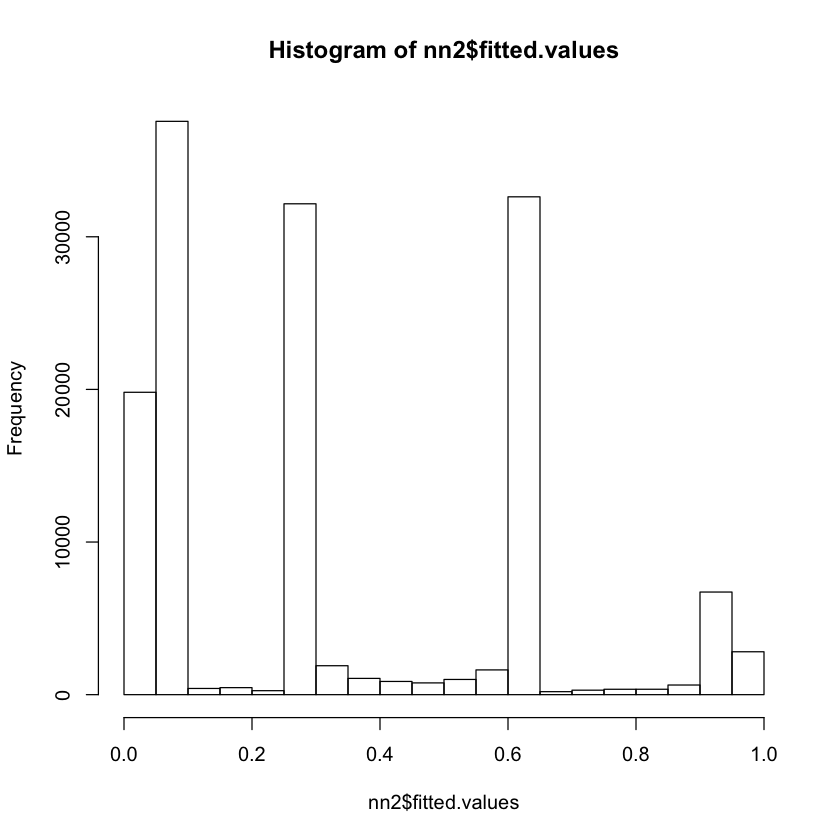

In [41]:
# Conditional probability frequency histogram
hist(nn2$fitted.values)